# House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data= pd.read_csv('./Cleaned Data.csv')
data.head()

,Unnamed: 0,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,kitchen_features_count,floor_covering_count
0,0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,6,0.0,4,2
1,1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,5,0.0,2,2
2,4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,5,55.0,5,2
3,5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,5,422.0,5,3
4,6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8.0,12025.0,4.0,6,0.0,3,4


In [3]:
data['rooms'] = data.bathrooms+data.bedrooms

In [4]:
data['price_per_rooms'] = data.sold_price/data.rooms

In [5]:
data['sold_price_scaled'] = (data.sold_price-min(data.sold_price))/(max(data.sold_price)-min(data.sold_price))

In [6]:
data.sold_price_scaled

0       1.000000
1       0.776650
2       0.616538
3       0.583756
4       0.411168
          ...   
4360    0.032284
4361    0.034518
4362    0.038579
4363    0.032487
4364    0.035533
Name: sold_price_scaled, Length: 4365, dtype: float64

In [7]:
data['price_per_sqfoot'] = data.sold_price/data.sqrt_ft

<Axes: title={'center': 'Price per Sqfoot'}, ylabel='Frequency'>

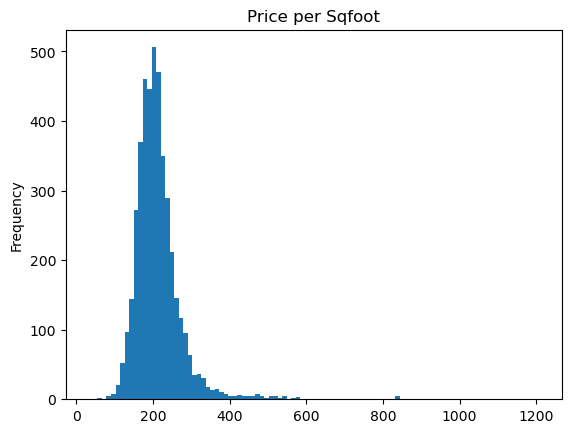

In [8]:
data.price_per_sqfoot.plot(kind='hist', bins=100, title='Price per Sqfoot')

In [9]:
data=data[(data['price_per_sqfoot']<=800) &  (data['price_per_sqfoot']>=100)]

### Creating Categories based on Price per Sqfoot

In [10]:
bins=[100,150,200,250,300,350,400,450,500,550,600,650,700,750,800]
labels=[13,12,11,10,9,8,7,6,5,4,3,2,1,0]

data['cat']= pd.cut(x=data.price_per_sqfoot,bins=bins,labels=labels,include_lowest=True)

In [11]:
data.cat.value_counts()

12    1679
11    1570
10     524
13     329
9      129
8       47
7       21
6       20
5       15
4        6
3        2
1        1
0        1
2        0
Name: cat, dtype: int64

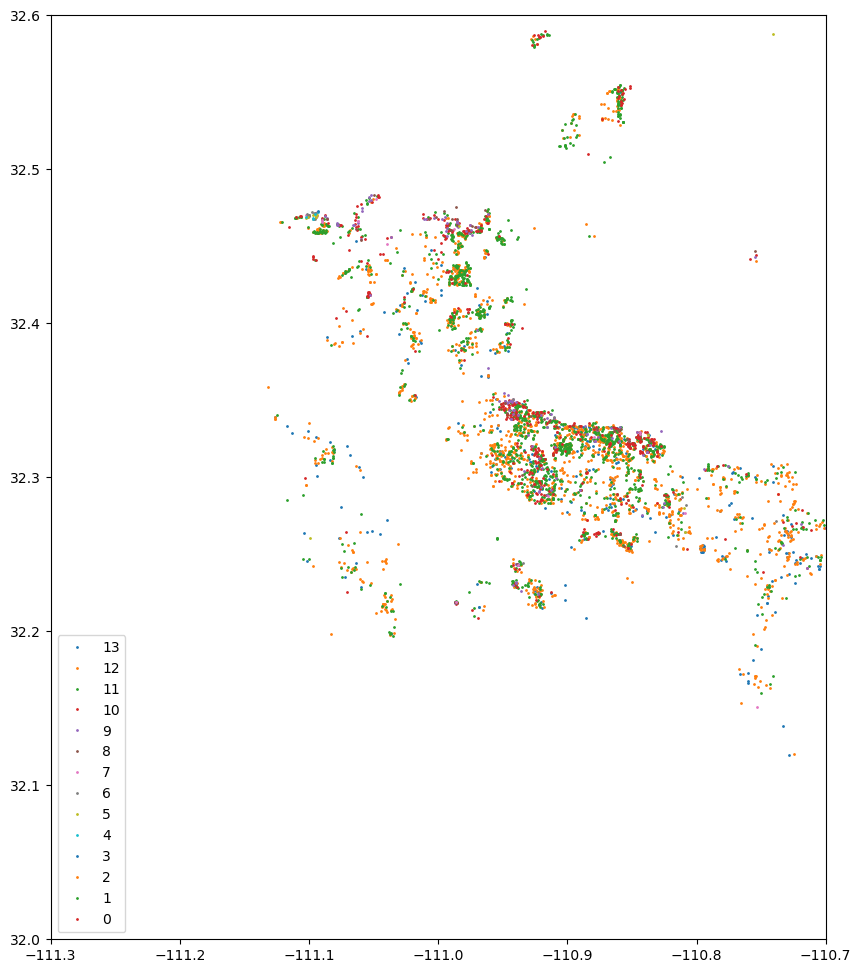

In [12]:
plt.figure(figsize=(10,12))
groups = data.groupby('cat')
for name, group in groups:
    plt.plot(group.longitude, group.latitude, marker='o', linestyle='', markersize=1, label=name)


plt.xlim(-111.3,-110.7)
plt.ylim(32,32.6)
plt.legend()

C:\Users\Consultant\AppData\Local\Temp\ipykernel_7200\1329500317.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'floor_covering_count','lot_acres', 'year_built','rooms','cat']].corr(), annot=True,cmap='coolwarm')


<Axes: >

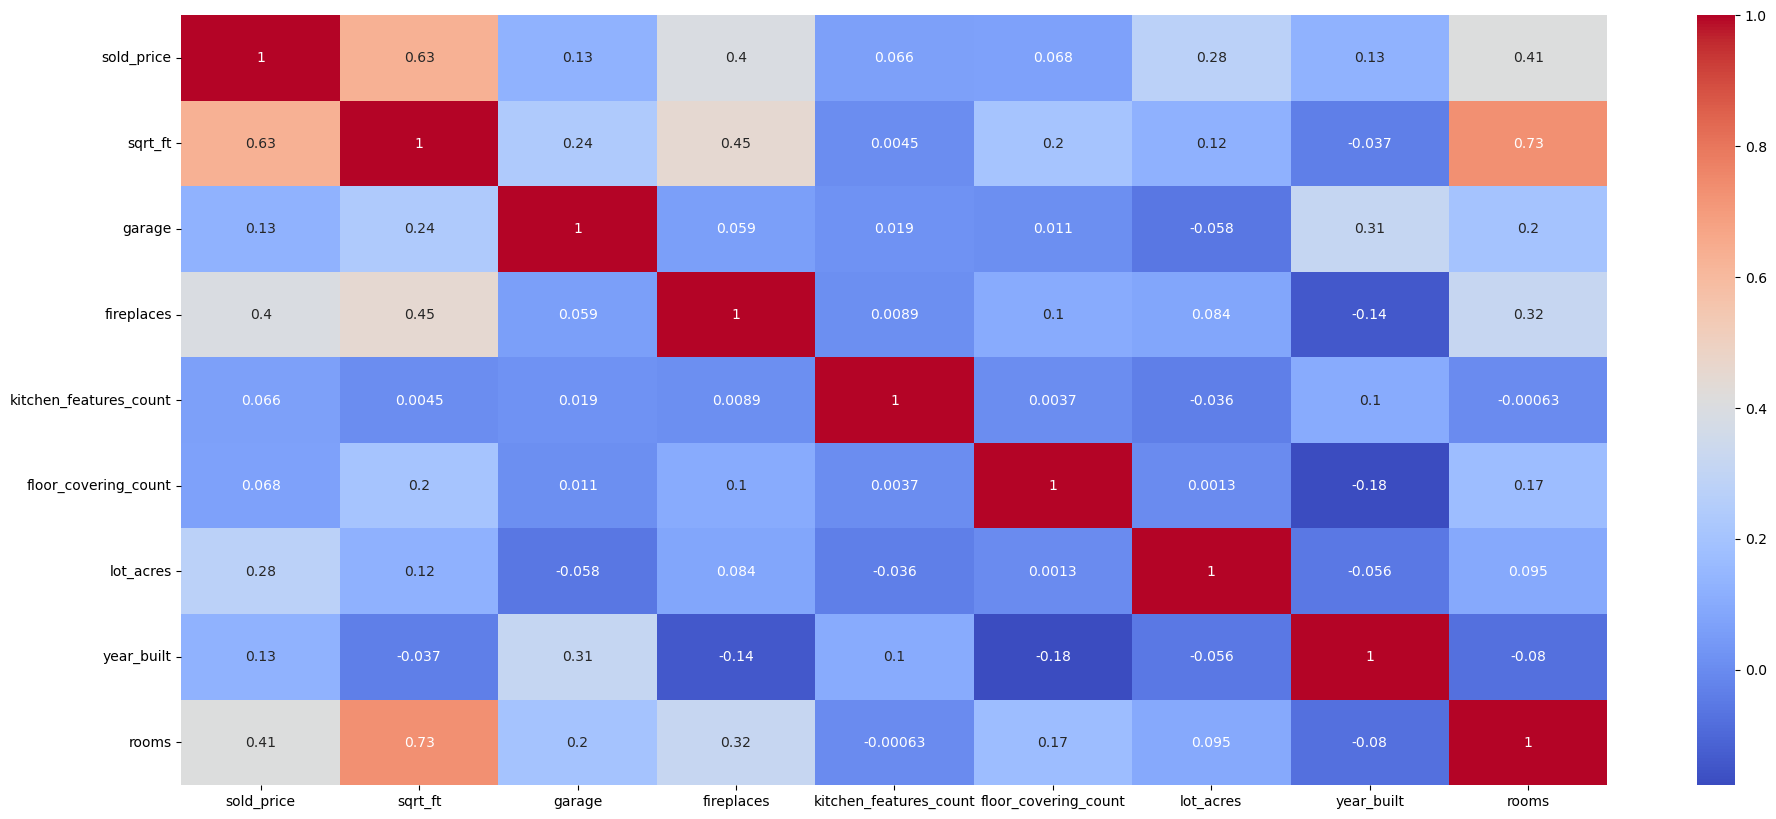

In [13]:
plt.figure(figsize=(23,10))
sns.heatmap(data[['sold_price','sqrt_ft','garage', 'fireplaces', 'kitchen_features_count',
       'floor_covering_count','lot_acres', 'year_built','rooms','cat']].corr(), annot=True,cmap='coolwarm')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4344 entries, 0 to 4364
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Unnamed: 0              4344 non-null   int64   
 1   MLS                     4344 non-null   int64   
 2   sold_price              4344 non-null   float64 
 3   zipcode                 4344 non-null   int64   
 4   longitude               4344 non-null   float64 
 5   latitude                4344 non-null   float64 
 6   lot_acres               4344 non-null   float64 
 7   taxes                   4344 non-null   float64 
 8   year_built              4344 non-null   int64   
 9   bedrooms                4344 non-null   int64   
 10  bathrooms               4344 non-null   float64 
 11  sqrt_ft                 4344 non-null   float64 
 12  garage                  4344 non-null   float64 
 13  fireplaces              4344 non-null   int64   
 14  HOA                     

### Train and Test Data Split

In [15]:
train_data = data.sample(frac=0.75, random_state=1)
test_data = data.drop(train_data.index)

print(f"No. of train data: {train_data.shape[0]}")
print(f"No. of test data: {test_data.shape[0]}")

No. of train data: 3258
No. of test data: 1086


In [16]:
train_data.columns

Index(['Unnamed: 0', 'MLS', 'sold_price', 'zipcode', 'longitude', 'latitude',
       'lot_acres', 'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft',
       'garage', 'fireplaces', 'HOA', 'kitchen_features_count',
       'floor_covering_count', 'rooms', 'price_per_rooms', 'sold_price_scaled',
       'price_per_sqfoot', 'cat'],
      dtype='object')

## Cluster Modelling

In [17]:
features=['sqrt_ft','garage', 'fireplaces','lot_acres', 'year_built','rooms','latitude','longitude']

#features=['latitude','longitude']
target='cat'

CX_train=train_data[features].to_numpy()
Cy_train=train_data[target].to_numpy()

CX_test=test_data[features].to_numpy()
Cy_test=test_data[target].to_numpy()

### KNN Classifier 

In [18]:
class KNNClassifier():
    def fit(self, X,y):
        self.X=X
        self.y=y

    def predict(self, X, K, epsilon=1e-3):
        N=len(X)
        y_hat = np.zeros(N)

        for i in range(N):
            dist2=np.sum((self.X-X[i])**2, axis=1)
            idxt= np.argsort(dist2)[:K]
            gamma_k= 1/(np.sqrt(dist2[idxt]+epsilon))

            y_hat[i]= np.bincount(self.y[idxt], weights= gamma_k).argmax()

        return y_hat

In [19]:
def accuracy(y, y_hat):
    return np.mean(y==y_hat)

In [20]:
knn=KNNClassifier()
knn.fit(CX_train,Cy_train)

In [21]:
train_yhat=knn.predict(CX_train,7)
accuracy(Cy_train,train_yhat)

0.9920196439533456

In [22]:
test_yhat=knn.predict(CX_test,7)
accuracy(Cy_test,test_yhat)


0.46593001841620624

Text(0.5, 47.7222222222222, 'Predicted label')

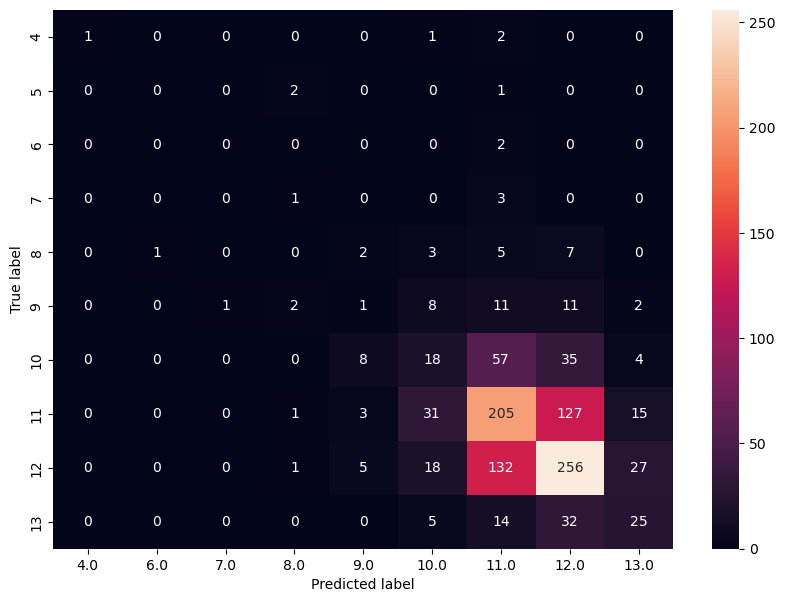

In [23]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(Cy_test, name='Actual')
y_pred = pd.Series(test_yhat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

## House Price Modelling

In [24]:
features=['sqrt_ft','garage', 'fireplaces', 'lot_acres', 'year_built','rooms','cat']

#features=['latitude','longitude']
target='sold_price'

RX_train=train_data[features].to_numpy()
Ry_train=train_data[target].to_numpy()

RX_test=test_data[features].to_numpy()
Ry_test=test_data[target].to_numpy()

In [25]:
RX_train.shape

(3258, 7)

In [26]:
Ry_train.shape

(3258,)

### Multivariate Linear Regression Model

In [27]:
def OLS(y, y_hat,N):
    #N = len(y)
    return (1/(2*N)*np.sum((y-y_hat)**2))

class MVLinearRegression():
    def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):

        epochs = int(epochs)
        N,D= X.shape

        Y=y
        
        # SGD cycle, Initialize the weights
        self.W = np.random.randn(D)

        J= np.zeros(epochs)

        for epoch in range(epochs):

            Y_hat = self.predict(X)
            J[epoch]= OLS(Y,Y_hat,N)

            self.W = self.W - eta*(1/N)*(X.T@(Y_hat-Y))

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.title("Training Curve")
            plt.show()


    def predict(self, X):
        return X @ self.W

In [28]:
def R2(y, y_hat):
    return (1 - (np.sum((y - y_hat)**2)/np.sum((y - np.mean(y))**2)))

In [29]:
mvr=MVLinearRegression()

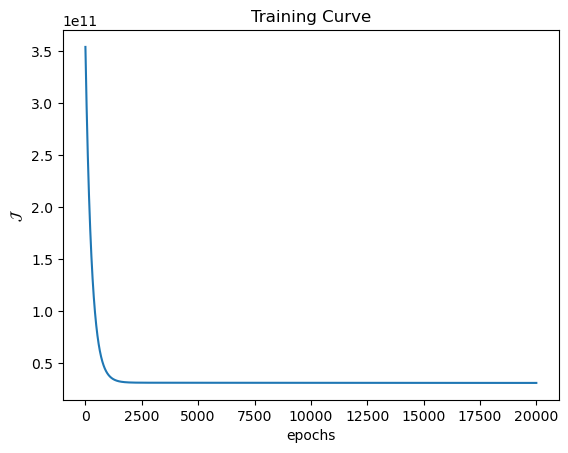

In [30]:
mvr.fit(RX_train, Ry_train,eta=1e-10, epochs=2e4, show_curve=True)

In [31]:
yhat=mvr.predict(RX_test)

In [32]:
yhat

array([1695832.48854411, 1441194.0118766 , 1246187.72057281, ...,
        555833.87405883,  584185.00889137,  646032.67157855])

In [33]:
R2(Ry_test,yhat)

0.44276050993753713

In [34]:

def RMSE(Y, Y_hat):
    n = len(Y)
    sq_err = (Y - Y_hat) ** 2
    mse = np.sum(sq_err) / n
    rmse = np.sqrt(mse)

    return rmse

In [35]:
RMSE(Ry_test,yhat)

219022.83379852073

In [36]:
yhat=mvr.predict(RX_train)

In [37]:
RMSE(Ry_train,yhat)

247698.5252075253

In [38]:
R2(Ry_train,yhat)

0.3769857953106265

### Make Prediction

In [39]:
from geopy import Nominatim

In [40]:
def getLatLon(address):
    geolocator=Nominatim(user_agent='DSUnited')
    location = geolocator.geocode(address)
    lat,lon,_=location.point
    
    return lat,lon

def predict_price(address,features):
    bed=features[5]
    bath=features[6]
    features=features[:5]+[bed+bath]
    #print(features)
    lat,lon=getLatLon(address)
    feat=np.array(features+[lat,lon]).reshape((1,8))
    #print(feat.shape)
    cat=knn.predict(feat,7)
    #print(cat)
    data=np.concatenate([features,cat])
    #print(data.shape)
    price=mvr.predict(data)
    
    print(f'The estimated house price per bedroom at "{address}" is ${round(price/bed,2)}')
    return round(price/bed,2)

In [41]:
#features=['sqrt_ft','garage', 'fireplaces','lot_acres', 'year_built','bedrooms','bathrooms']

In [42]:
price=predict_price('2435 E Placita De La Victoria',[3945,3,2,0.84, 2006,4,4])
price*4


The estimated house price per bedroom at "2435 E Placita De La Victoria" is $205982.13


823928.52